## Final Project Submission

In [ ]:
Please fill out:
Student name:
Student pace: self paced / part time / full time
Scheduled project review date/time:
Instructor name:
Blog post URL:

# ANALYSIS ON KEY INDICATORS OF HOUSE PRICES

## Research Objectives

###  Main Objective

To build a linear Regression Model that predicts House Prices

### Specific Objectives

To Identify key features that influence house House prices

To assess the feature with the highest impact on House prices

To evaluate and validate the performance of the model

## Business Problem

Real estate is a highly dynamic market influenced by numerous factors.This makes it challenging for real estate investors to accurately predict house prices. Inaccurate pricing models can lead to reduced profitability, missed opportunities,  and dissatisfied customers. The current pricing strategy of the real estate company is suboptimal, leading to potential loss of revenue and increased customer dissatisfaction. Hence, the need of a robust predictive pricing model to enable companies stay competitive and adapt to market fluctuations.

Key Challenges:

Difficulty in identifying the most influential features impacting house prices.

Inability to accurately predict house prices based on relevant features.

Limited understanding of the factors driving property value in the current market.

Lack of a data-driven pricing strategy, leading to potential underpricing or overpricing of properties.


## Project Overview

This project is an attempt to help real estate investors make informed decision on what type of houses they should invest in. This is in terms of the most impactful features, both positively and negatively, on House prices.The key components of the analysis include Data preparation, Feature selection and Engineering, Model Development, Evaluation and Validation.

In [171]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# loading the dataset
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [172]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [173]:
# checking summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data preprocessing


### Data cleaning

In [174]:
# checking null values
null= data.isna().sum()
null

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [175]:
# percentage of missing data
percentage_missing=null*100/len(data)
percentage_missing

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

From the results above one of the variables for our analysis 'view' has some missing data of 0.291707%. We will proceed and first clean that.

In [176]:
data["view"].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [177]:
# dealing with missing data on 'view' column
# drop the null values for 'view' since it is a small percentage
data.dropna(axis=0, subset=['view'], inplace=True)
data["view"].isnull().sum()

0

In [178]:
# replace null values in column 'waterfront' with place holder 'unknown'
data['waterfront'].fillna('Unknown', inplace=True)
data["waterfront"].isnull().sum()

0

In [179]:
data["yr_renovated"].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [180]:
# replace null values in column with place holder'0'
data['yr_renovated'].fillna('0', inplace=True)
data["yr_renovated"].isnull().sum()

0

In [181]:
# checking if all missing data have been cleaned
data.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We see that all the missing values have been cleaned

### Dealing with categorical variables

#### One-hot encoding

We are going to encode the categorical variables, 'grade', 'view', 'waterfront', 'condition'  to numeric

In [182]:
#encoding 'grade' column
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [183]:
# getting dummy variables
dummy_grade = pd.get_dummies(data['grade'], prefix='grade')

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_grade], axis=1)

# Dropping the original 'grade' column 
data = data.drop('grade', axis=1)
data = data.replace({True: 1, False: 0})

In [184]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0


In [185]:
#encoding 'view' column
data['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [186]:
# getting dummies
dummy_view = pd.get_dummies(data['view'], prefix='view')

#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_view], axis=1)

# Dropping the original 'view' column 
data = data.drop('view', axis=1)
data = data.replace({True: 1, False: 0})

In [187]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,Average,...,0,0,1,0,0,0,0,0,0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,...,0,0,1,0,0,0,0,0,0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,...,0,1,0,0,0,0,0,0,0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,...,0,0,1,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,...,0,0,0,1,0,0,0,0,0,1


In [188]:
#encoding 'waterfront' column
data['waterfront'].unique()

array(['Unknown', 'NO', 'YES'], dtype=object)

In [189]:
# getting dummies
dummy_waterfront = pd.get_dummies(data['waterfront'], prefix='waterfront')

#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_waterfront], axis=1)

# Dropping the original 'condition' column 
data = data.drop('waterfront', axis=1)

data = data.replace({True: 1, False: 0})

In [190]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,...,grade_8 Good,grade_9 Better,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,1180,...,0,0,0,0,0,0,1,0,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,2170,...,0,0,0,0,0,0,1,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,770,...,0,0,0,0,0,0,1,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,1050,...,0,0,0,0,0,0,1,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,1680,...,1,0,0,0,0,0,1,1,0,0


In [191]:
#encoding 'condition' column
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [192]:
# getting dummies
dummy_condition = pd.get_dummies(data['condition'], prefix='condition')

#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_condition], axis=1)

# Dropping the original 'condition' column 
data = data.drop('condition', axis=1)
data = data.replace({True: 1, False: 0})

In [193]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1180,0.0,...,0,1,0,1,0,1,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,...,0,1,1,0,0,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,770,0.0,...,0,1,1,0,0,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1050,910.0,...,0,1,1,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1680,0.0,...,0,1,1,0,0,1,0,0,0,0


In [194]:
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [195]:
dropping_question_mark = data[data['sqft_basement'] == '?']
data = data.drop(dropping_question_mark.index )

In [196]:
# changing data type of 'sqft_basement' to float
data['sqft_basement'] = data['sqft_basement'].astype('float64')

In [197]:
data.dtypes

id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
sqft_above               int64
sqft_basement          float64
yr_built                 int64
yr_renovated            object
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
grade_10 Very Good       int64
grade_11 Excellent       int64
grade_12 Luxury          int64
grade_13 Mansion         int64
grade_3 Poor             int64
grade_4 Low              int64
grade_5 Fair             int64
grade_6 Low Average      int64
grade_7 Average          int64
grade_8 Good             int64
grade_9 Better           int64
view_AVERAGE             int64
view_EXCELLENT           int64
view_FAIR                int64
view_GOOD                int64
view_NON

### Exploratory Data Analysis

In [198]:
data.shape

(21082, 41)

In [199]:
data.dtypes

id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
sqft_above               int64
sqft_basement          float64
yr_built                 int64
yr_renovated            object
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
grade_10 Very Good       int64
grade_11 Excellent       int64
grade_12 Luxury          int64
grade_13 Mansion         int64
grade_3 Poor             int64
grade_4 Low              int64
grade_5 Fair             int64
grade_6 Low Average      int64
grade_7 Average          int64
grade_8 Good             int64
grade_9 Better           int64
view_AVERAGE             int64
view_EXCELLENT           int64
view_FAIR                int64
view_GOOD                int64
view_NON

In [200]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'waterfront_NO', 'waterfront_Unknown',
       'waterfront_YES', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good'],
      dtype='object')

In [201]:
data = data.drop(['id', 'date', 'yr_renovated'], axis=1)

### Checking outliers

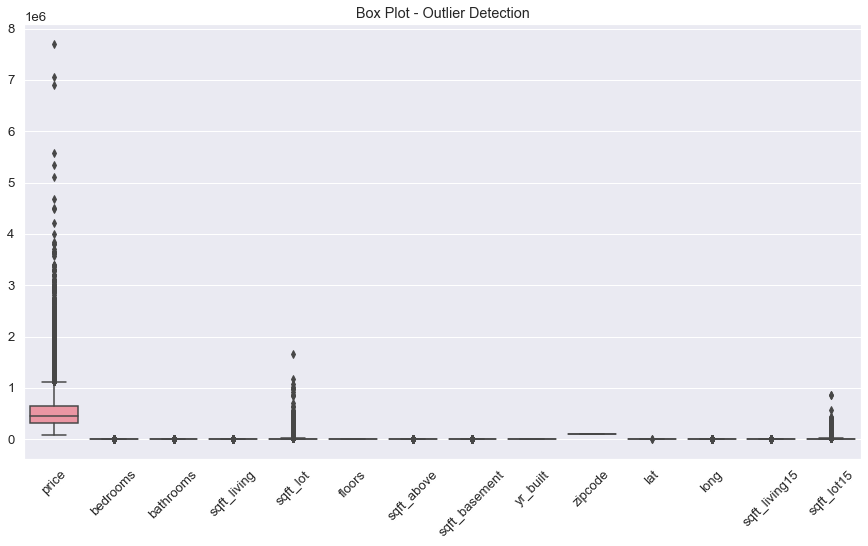

Outliers:
           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1230000.0         4       4.50         5420    101930     1.0   
10      662500.0         3       2.50         3560      9796     1.0   
21     2000000.0         3       2.75         3050     44867     1.0   
41      775000.0         4       2.25         4220     24186     1.0   
70     1040000.0         5       3.25         4770     50094     1.0   
...          ...       ...        ...          ...       ...     ...   
21545   750000.0         5       4.00         4500      8130     2.0   
21552  1700000.0         4       3.50         3830      8963     2.0   
21560  3570000.0         5       4.50         4850     10584     2.0   
21574  1220000.0         4       3.50         4910      9444     1.5   
21584  1540000.0         5       3.75         4470      8088     2.0   

       sqft_above  sqft_basement  yr_built  zipcode  ...  view_GOOD  \
5            3890         1530.0      2001    98053  .

In [202]:
# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Calculating z-scores for numerical features
numeric_features =[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
z_scores = data[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-score threshold ( z-score > 3 or z-score < -3)
outliers = data[(z_scores > 3).any(axis=1)]

# Print the outliers
print('Outliers:')
print(outliers)

We have outliers in 'price','sqft_lot', 'sqft_lot15'.

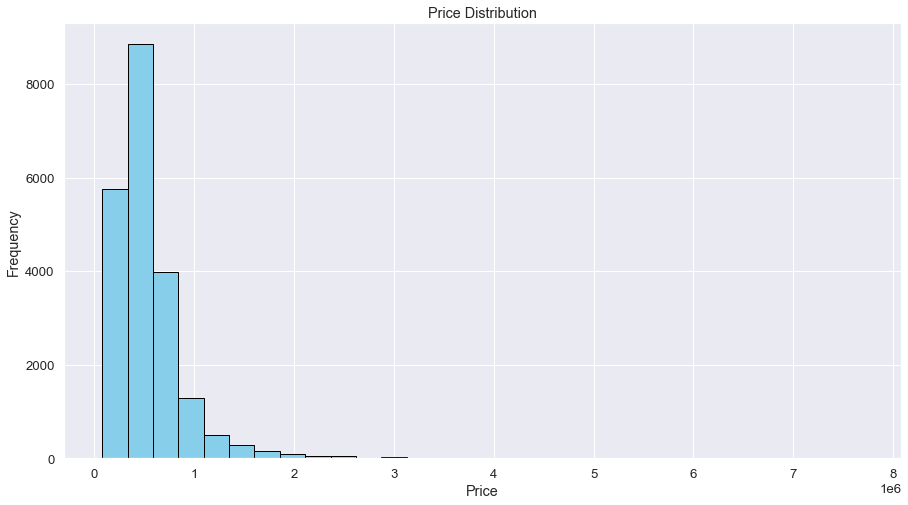

In [203]:
# visualizing price ditribution
plt.figure(figsize=(15, 8))
plt.hist(data['price'], bins= 30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The outliers in price are important since they are variations in price levels. For 'sqft_lot', 'sqft_lot15' we may need to perform some transformations on them.

In [204]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,...,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,...,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,1789.000000,291.359975,1971.023337,98077.858837,...,0.023527,0.902097,0.882649,0.110663,0.006688,0.649274,0.007874,0.262689,0.001328,0.078835
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,828.369355,442.007858,29.323120,53.528769,...,0.151574,0.297191,0.321846,0.313722,0.081509,0.477209,0.088388,0.440105,0.036420,0.269487
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,370.000000,0.000000,1900.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,1200.000000,0.000000,1952.000000,98033.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,1560.000000,0.000000,1975.000000,98065.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,2210.000000,560.000000,1997.000000,98117.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,9410.000000,4820.000000,2015.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking correlations and dealing with multicollinearity

In [205]:
# Correlation matrix to see our variable correlations
correlation_matrix = data.corr()
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,...,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
price,1.000000,0.308454,0.525029,0.702004,0.088400,0.256603,0.605481,0.323018,0.054849,-0.053429,...,0.183829,-0.359326,-0.055680,-0.010632,0.260777,0.009548,-0.052401,-0.033639,-0.020132,0.057935
bedrooms,0.308454,1.000000,0.513694,0.577696,0.032531,0.178518,0.478967,0.301987,0.156820,-0.152539,...,0.049832,-0.080646,0.005788,-0.005528,-0.001578,0.007366,-0.049792,-0.011579,-0.037211,0.027225
bathrooms,0.525029,0.513694,1.000000,0.754793,0.088451,0.503796,0.685959,0.281813,0.508866,-0.204016,...,0.112348,-0.176624,-0.010212,-0.005646,0.062055,0.193346,-0.076150,-0.169355,-0.044078,-0.034867
sqft_living,0.702004,0.577696,0.754793,1.000000,0.173266,0.354260,0.876787,0.433369,0.319584,-0.198987,...,0.158828,-0.270032,-0.019120,-0.007231,0.103331,0.105459,-0.064201,-0.087109,-0.035674,-0.018609
sqft_lot,0.088400,0.032531,0.088451,0.173266,1.000000,-0.007745,0.183653,0.015612,0.052469,-0.129626,...,0.069025,-0.066519,-0.004858,-0.000528,0.021216,-0.011576,0.039403,0.012719,0.006813,-0.014117
floors,0.256603,0.178518,0.503796,0.354260,-0.007745,1.000000,0.523594,-0.245628,0.489898,-0.058443,...,0.020403,-0.015586,0.000332,-0.005499,0.019853,0.318246,-0.055165,-0.258017,-0.024924,-0.120716
sqft_above,0.605481,0.478967,0.685959,0.876787,0.183653,0.523594,1.000000,-0.053403,0.425170,-0.260751,...,0.091573,-0.152795,-0.007713,-0.010356,0.070315,0.195751,-0.057586,-0.144535,-0.030082,-0.087641
sqft_basement,0.323018,0.301987,0.281813,0.433369,0.015612,-0.245628,-0.053403,1.000000,-0.133178,0.075466,...,0.158198,-0.274383,-0.025249,0.004391,0.082796,-0.147867,-0.025396,0.089988,-0.017704,0.125605
yr_built,0.054849,0.156820,0.508866,0.319584,0.052469,0.489898,0.425170,-0.133178,1.000000,-0.346743,...,-0.019078,0.063933,0.010167,-0.004102,-0.024358,0.391816,-0.067112,-0.258110,-0.049110,-0.243656
zipcode,-0.053429,-0.152539,-0.204016,-0.198987,-0.129626,-0.058443,-0.260751,0.075466,-0.346743,1.000000,...,0.043030,-0.091562,-0.019363,0.012401,0.028723,0.017534,0.023947,-0.059936,0.010924,0.057503


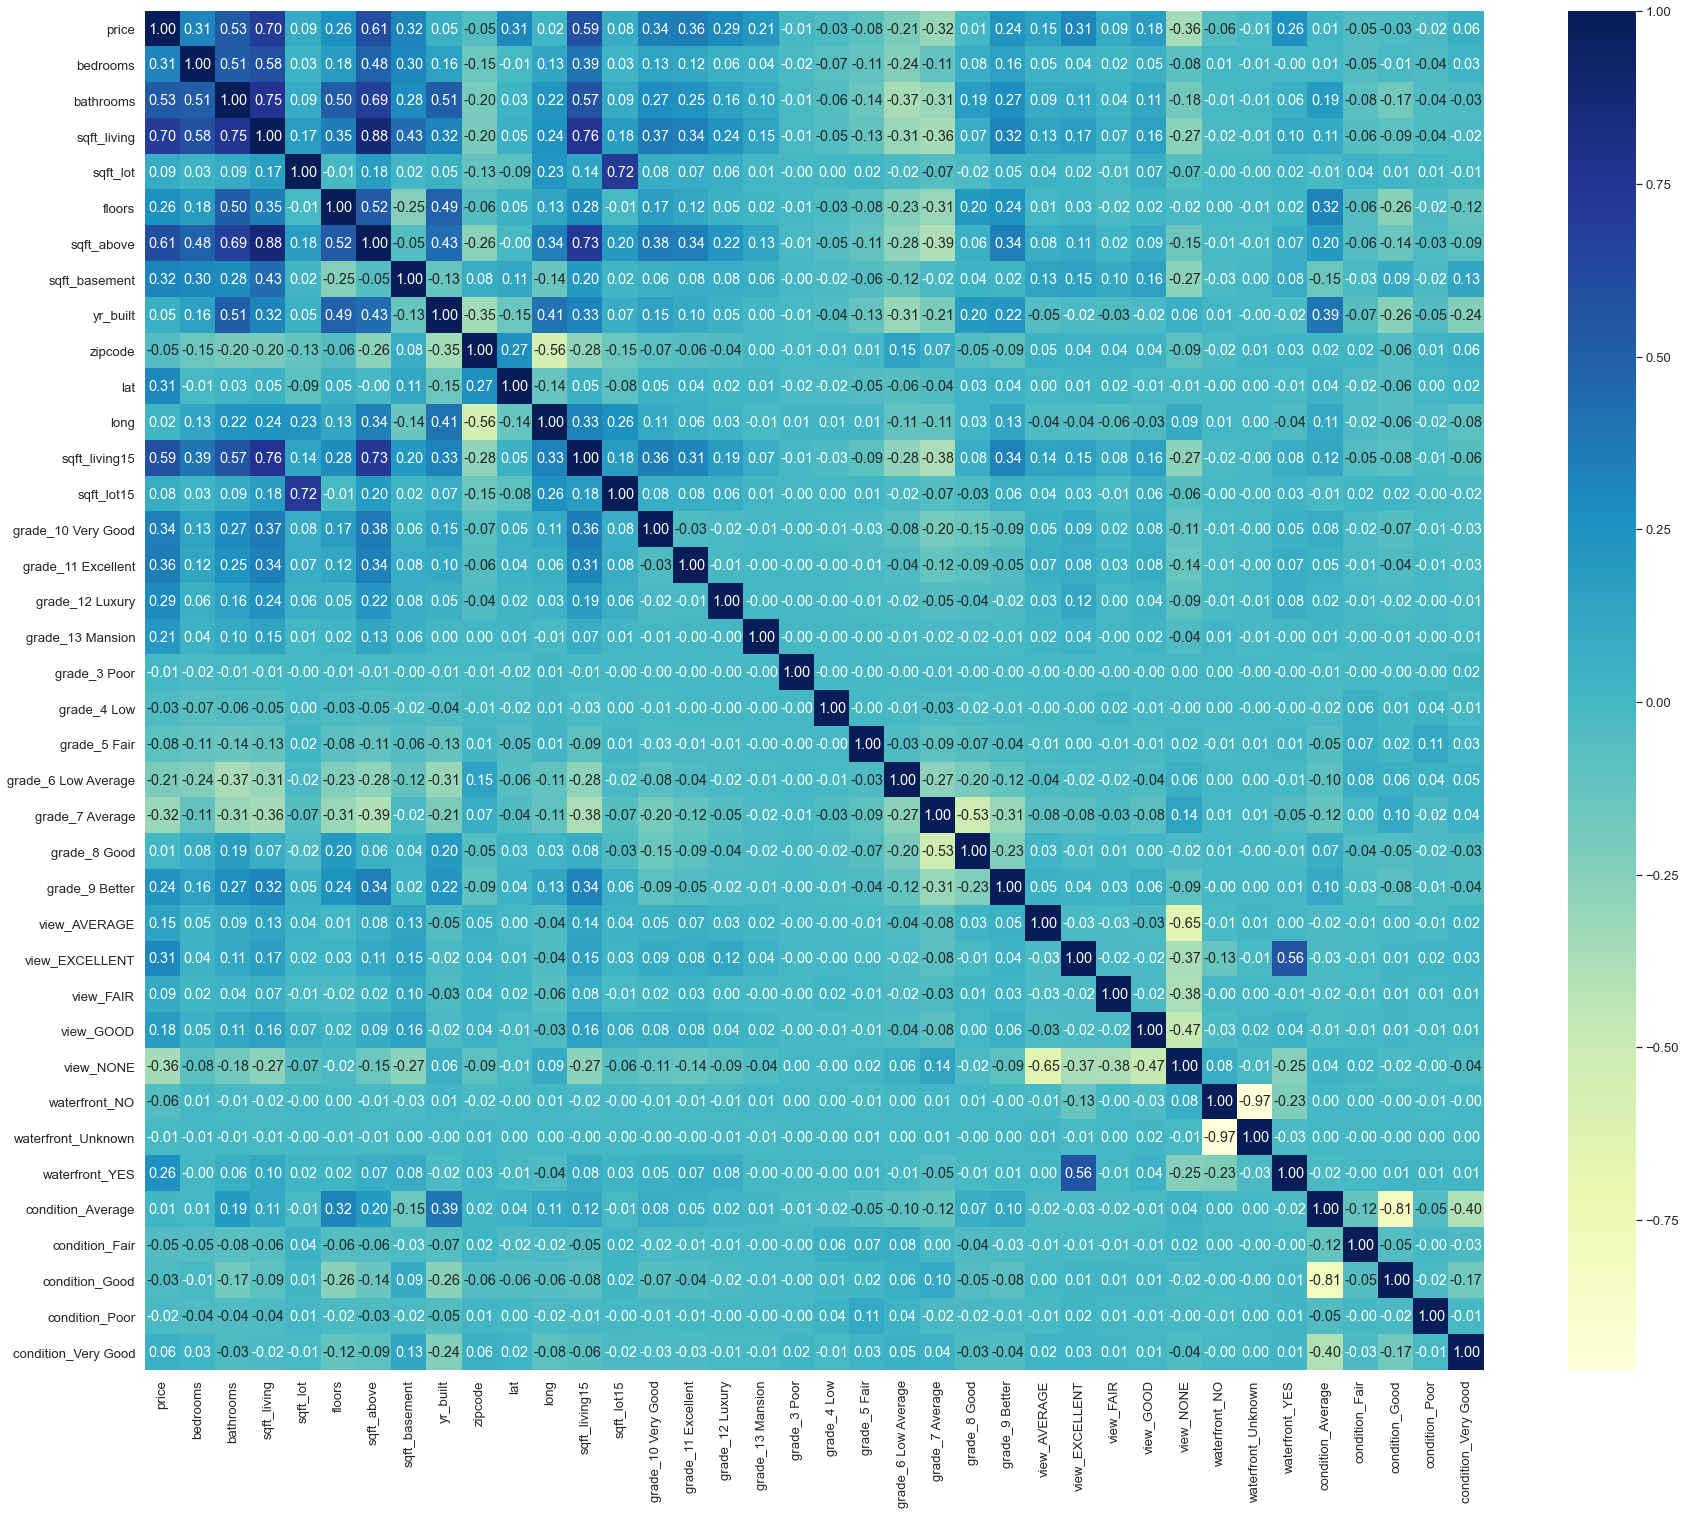

In [206]:
# visualizing the correlations using heatmap
plt.figure(figsize=(30,25))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, fmt="0.2f", cmap="YlGnBu")
plt.show()

#### Checking highly correlated pairs

In [207]:
# checking the highly correlated variables
#getting variables with high correlation, having 0.75 as the threshold
threshold = 0.75

# Finding indices where correlation is greater than the threshold and exclude self-correlation
row, col = np.where((np.abs(correlation_matrix) > threshold) & (np.abs(correlation_matrix) < 1))

# Creating a DataFrame with the pairs of variables and their correlation
high_corr_pairs = pd.DataFrame({
    'First_Variable': correlation_matrix.index[row],
    'Second_variable': correlation_matrix.columns[col],
    'Correlation': correlation_matrix.values[row, col]
})

# Display the pairs with high correlation
high_corr_pairs

,First_Variable,Second_variable,Correlation
0,bathrooms,sqft_living,0.754793
1,sqft_living,bathrooms,0.754793
2,sqft_living,sqft_above,0.876787
3,sqft_living,sqft_living15,0.756199
4,sqft_above,sqft_living,0.876787
5,sqft_living15,sqft_living,0.756199
6,waterfront_NO,waterfront_Unknown,-0.967427
7,waterfront_Unknown,waterfront_NO,-0.967427
8,condition_Average,condition_Good,-0.812130
9,condition_Good,condition_Average,-0.812130


To deal with the multicollinearity, we will drop some values causing the multicollinearity.

In [208]:
# dropping "bathrooms"
data.drop('bathrooms', axis=1, inplace=True)

In [209]:
# dropping "sqft_living15"
data.drop('sqft_living15', axis=1, inplace=True)

In [210]:
# dropping "waterfront_Unknown"
data.drop('waterfront_Unknown', axis=1, inplace=True)

In [211]:
# dropping "condition_Average"
data.drop('condition_Average', axis=1, inplace=True)

In [212]:
# dropping "condition_Good"
data.drop('condition_Good', axis=1, inplace=True)

In [213]:
# dropping "sqft_lot15" which had outlier
data.drop('sqft_lot15', axis=1, inplace=True)

In [214]:
# Checking correlations with price
corr_with_price=data.corr()['price']
corr_with_price

price                  1.000000
bedrooms               0.308454
sqft_living            0.702004
sqft_lot               0.088400
floors                 0.256603
sqft_above             0.605481
sqft_basement          0.323018
yr_built               0.054849
zipcode               -0.053429
lat                    0.307667
long                   0.022512
grade_10 Very Good     0.341166
grade_11 Excellent     0.356823
grade_12 Luxury        0.287253
grade_13 Mansion       0.214754
grade_3 Poor          -0.005226
grade_4 Low           -0.032053
grade_5 Fair          -0.084017
grade_6 Low Average   -0.209440
grade_7 Average       -0.317149
grade_8 Good           0.005588
grade_9 Better         0.236420
view_AVERAGE           0.147555
view_EXCELLENT         0.307035
view_FAIR              0.093931
view_GOOD              0.183829
view_NONE             -0.359326
waterfront_NO         -0.055680
waterfront_YES         0.260777
condition_Fair        -0.052401
condition_Poor        -0.020132
conditio

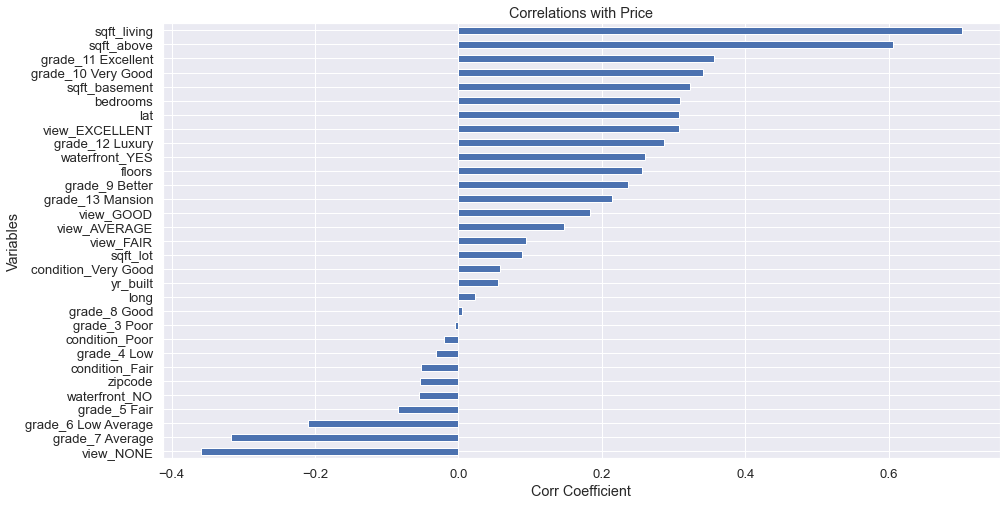

In [215]:
# plotting correlations with price
plt.figure(figsize=(15, 8))
corr_with_price.drop('price').sort_values().plot(kind='barh')
plt.title('Correlations with Price')
plt.xlabel('Corr Coefficient')
plt.ylabel('Variables')
plt.show();


### Checking if the data distributions are normal

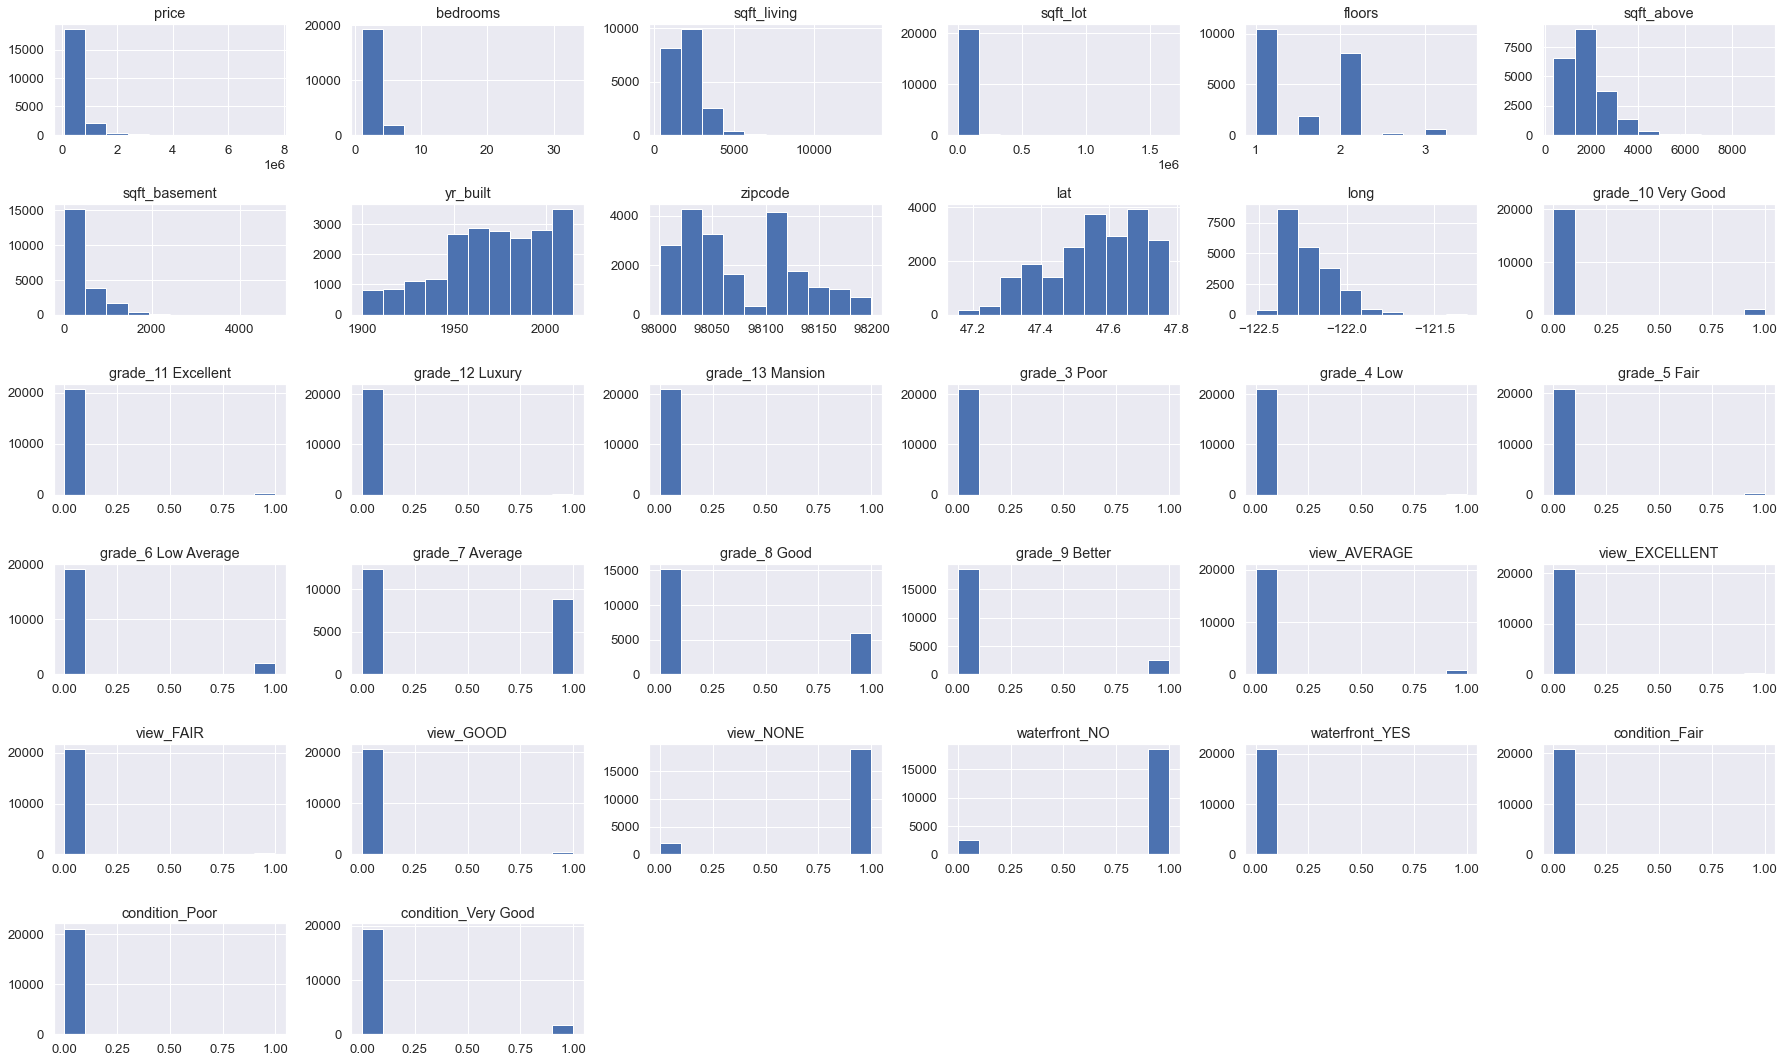

In [216]:
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

Most variables dont follow a normal ditribution.

## Building Linear Regression Model

##  Model Iterations

### Building a baseline model(model1)
We will use simple linear regression as the baseline model performance.

In [217]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [218]:
data.corr()['price']

price                  1.000000
bedrooms               0.308454
sqft_living            0.702004
sqft_lot               0.088400
floors                 0.256603
sqft_above             0.605481
sqft_basement          0.323018
yr_built               0.054849
zipcode               -0.053429
lat                    0.307667
long                   0.022512
grade_10 Very Good     0.341166
grade_11 Excellent     0.356823
grade_12 Luxury        0.287253
grade_13 Mansion       0.214754
grade_3 Poor          -0.005226
grade_4 Low           -0.032053
grade_5 Fair          -0.084017
grade_6 Low Average   -0.209440
grade_7 Average       -0.317149
grade_8 Good           0.005588
grade_9 Better         0.236420
view_AVERAGE           0.147555
view_EXCELLENT         0.307035
view_FAIR              0.093931
view_GOOD              0.183829
view_NONE             -0.359326
waterfront_NO         -0.055680
waterfront_YES         0.260777
condition_Fair        -0.052401
condition_Poor        -0.020132
conditio

For our baseline model we will use the feature 'sqft_living' since it is the most highly correlated with price.

In [219]:
# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']] 
y = data['price']
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.048e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:            -2.9287e+05
No. Observations:               21082   AIC:                         5.857e+05
Df Residuals:                   21080   BIC:                         5.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.327e+04   4456.393     -9.709      

From the first model we note that the R squared is 0.493 to mean that 49.3% of variations in price are explained by square foot living.

The F statistic is 0.00 indicating that the overall model is significant.

The Model RSME is 261170.8023960749.

We had earlier noted that most variables did not follow a normal distribution 'price' being one of them. We will therefore log transform price to see if the model improves.

### Model 2

Here we are inspecting how the model performs with only the 'price' transformed.

In [220]:
# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']] 
y = np.log(data['price']+1)
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.970e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:                -9429.6
No. Observations:               21082   AIC:                         1.886e+04
Df Residuals:                   21080   BIC:                         1.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2190      0.006   1892.178      

The square foot of living now explains 48.3% ( R squared) of variations in price. We also still have an error 'The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.' We will then explore how the model performs after transforming both the feature and target variable.

### Model 3

Here we have both 'sqft_living ' and 'price transformed'

In [221]:
# Selecting the dependent and independent variable
X = np.log(data[['sqft_living']]) 
y = np.log(data['price']+1)
# adding a constant for the intercept
model = sm.OLS(y, sm.add_constant(X))
#fit the model
results = model.fit()
#make predictions
y_pred = results.predict(sm.add_constant(X))
# calculate rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
# displaying results

print(results.summary())

print(" RMSE for the baseline model:", rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:                -9989.4
No. Observations:               21082   AIC:                         1.998e+04
Df Residuals:                   21080   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7255      0.048    140.854      

For the transformed variables, the target variable(price ) is now explained by 45.5%(R squared) in price. We also note that the error we were getting that (there is a  possiblity of strong multicollinearity or other numeric problems) has been resolved. 

In the next model we will try transform multiple features that do not follow a normal distribution and add them to our model. Then inspect how our model performs.

### Before log transformation

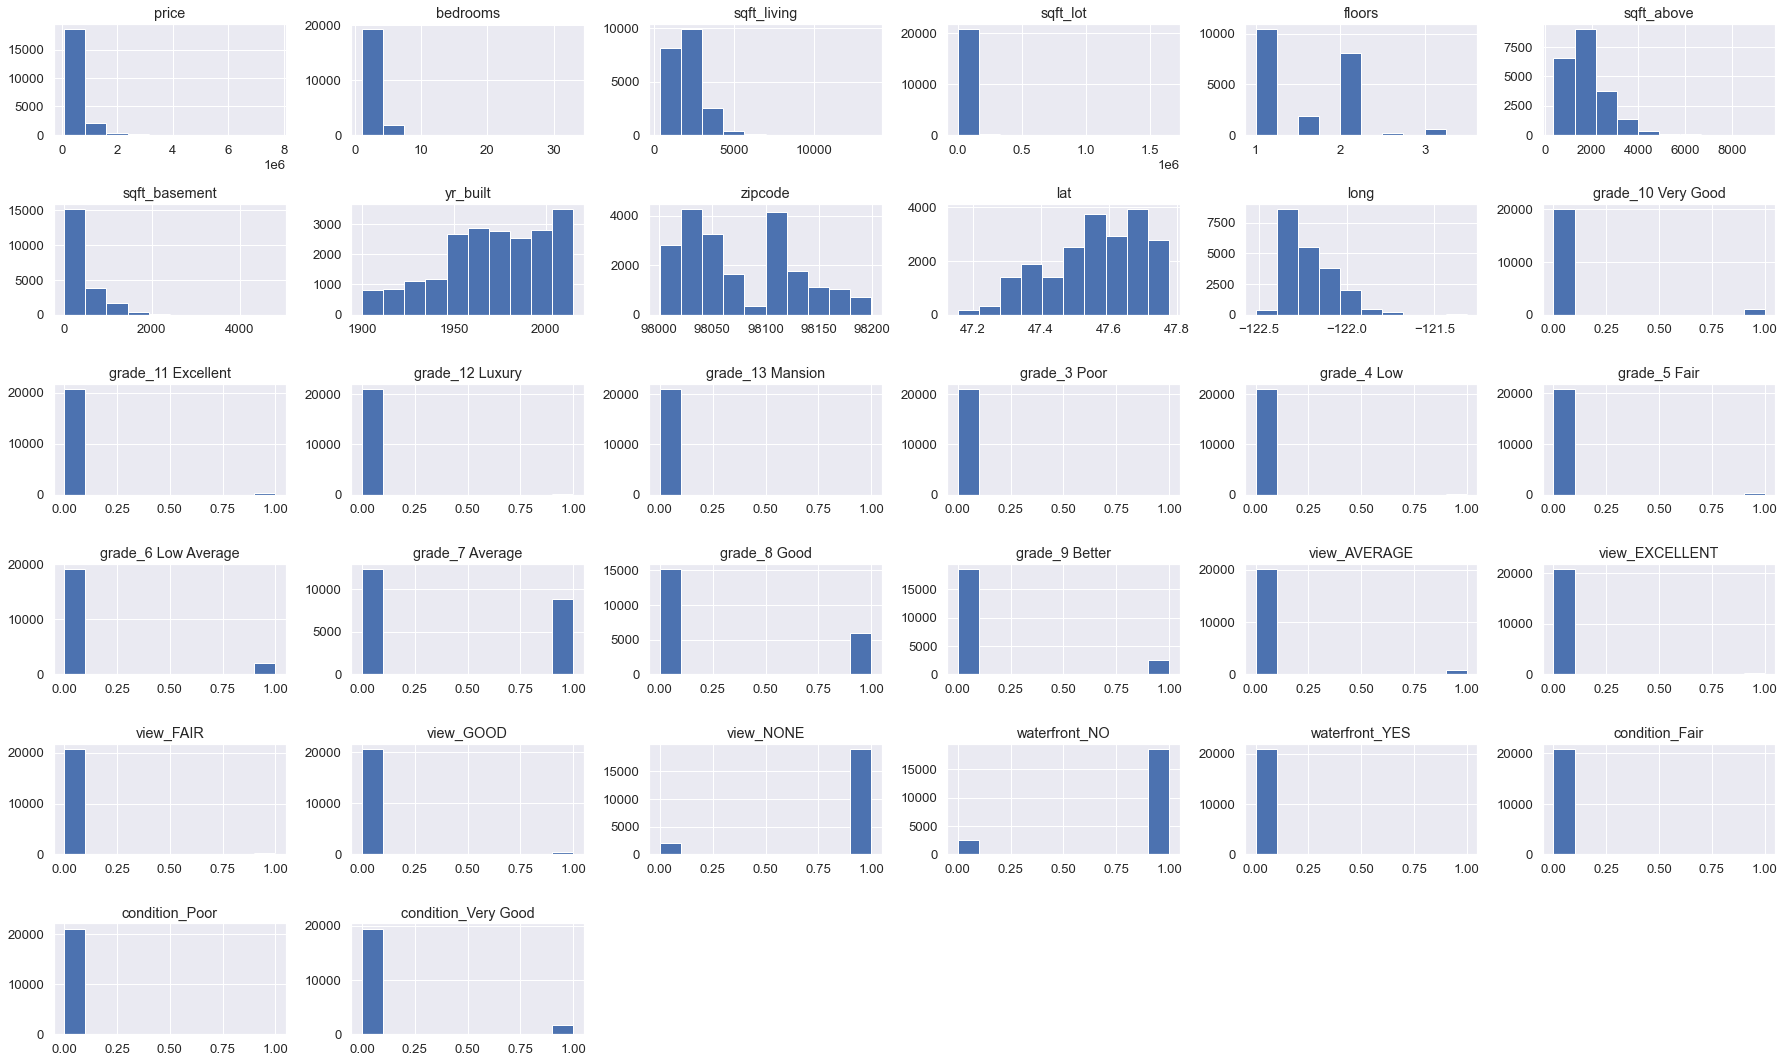

In [222]:
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

### After log transformation

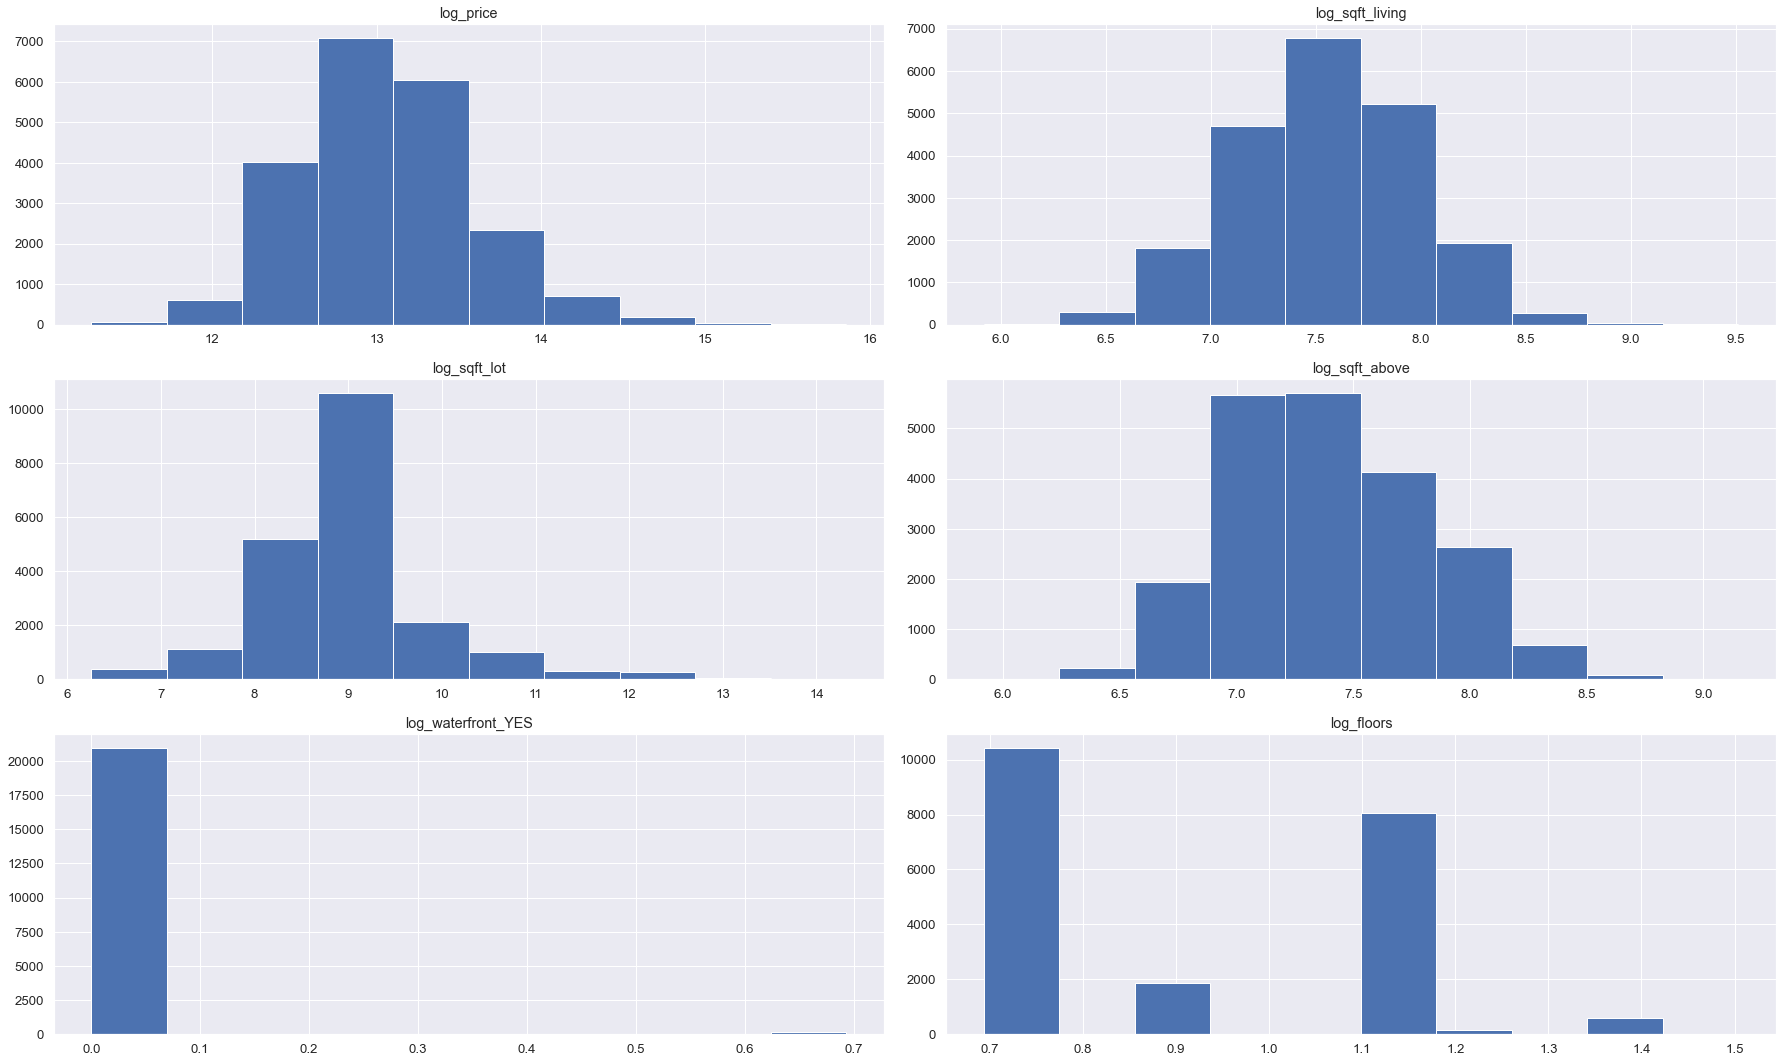

In [223]:
# log transformation to normalize the variables and rename them 
data["log_price"]=np.log(data["price"]+1)
data["log_sqft_living"]=np.log(data["sqft_living"]+1)
data["log_sqft_lot"]=np.log(data["sqft_lot"]+1)
data["log_sqft_above"]=np.log(data["sqft_above"]+1)
data["log_waterfront_YES"]=np.log(data["waterfront_YES"]+1)
data["log_floors"]=np.log(data["floors"]+1)
# checking the transformed
plot_data=data[["log_price",'log_sqft_living' ,'log_sqft_lot', 'log_sqft_above', 'log_waterfront_YES', 'log_floors']]
plot_data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

### Model 4

In [231]:
# Selecting  independent and dependent variables and using some transformed variables
X = data[['log_sqft_living', 'waterfront_YES', 'view_EXCELLENT', 'condition_Very Good','grade_7 Average', 
        'grade_9 Better','grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'log_sqft_above', 'log_sqft_lot']] 

y = data['log_price']


# Adding a constant term for the intercept in the multiple regression model
model=sm.OLS(y, sm.add_constant(X))

# Fitting the multiple regression model
results = model.fit()
#making predictions
y_pred=results.predict(sm.add_constant(X))
#calculating rsme
rmse=np.sqrt(mean_squared_error(y, y_pred))

# Display the summary of the regression and rmse
print(results.summary())
print(" RMSE for the baseline model:", rmse)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2243.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:38:53   Log-Likelihood:                -7708.2
No. Observations:               21082   AIC:                         1.544e+04
Df Residuals:                   21069   BIC:                         1.555e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.1349    

With transforming and additional features R squared and adjusted R squared have now increased to 56.1%. Meaning that 56.1% of variations in price are now explained by
The F statistic probability is 0.00 to mean that the model overall is significant.
RSME is also now at  0.34878164210142815 which is less than what we had in the log transformed baseline model which we found rmse as 0.3886403105841183.This means that our model accuracy has improved.

### Checking Regression Assumptions

We are going to check if the Regression model has passed the assumptions before doing interpretation of the results.

We will inspect **Linearity, Independence, Normality and Equal Variance**

### Linearity

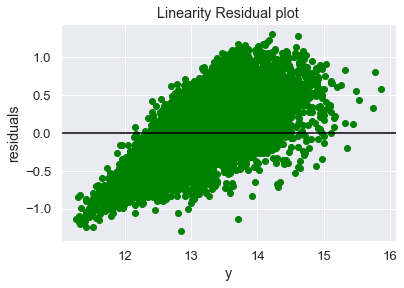

In [232]:
# plotting model results
fig, ax=plt.subplots()
ax.scatter(y, results.resid, color='green')
ax.axhline(y=0, color='black')
ax.set_xlabel('y')
ax.set_ylabel('residuals')
ax.set_title('Linearity Residual plot');

The points form a curvature to mean that the linearity assumption is met

#### Rainbow stat-test for linearity

In [233]:
# performing a rainbow test to test linearity statistically
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results)

(0.9485833390658518, 0.9966225779067938)

The p value is close to 1.This high p-value indicates that there is not enough evidence to reject the null hypothesis of linearity. Therefore, based on this test, the assumption of linearity is considered to be met.

## Independence

The Durbin-Watson statistic is around 1.976 which suggests little to no autocorrelation in the residuals.

## The Normality Assumption

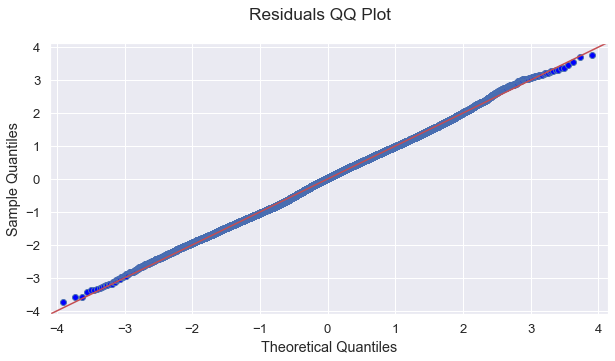

In [234]:
import scipy.stats as stats
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot')
fig.set_size_inches(10, 5)
plt.show()

## The Homoscedasticity Assumption(Equal Variance)

Text(0, 0.5, 'Residuals')

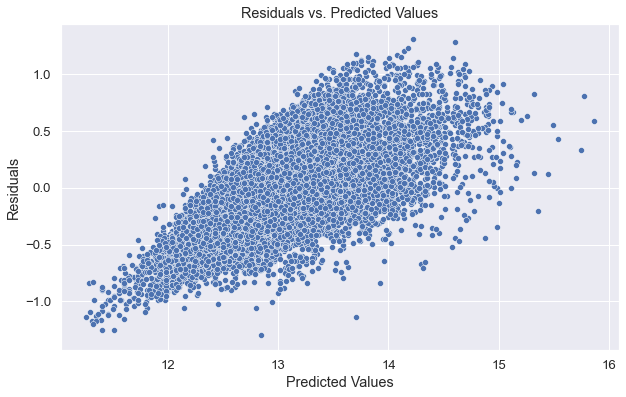

In [236]:
# scatter plot to check homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_price'], y=results.resid)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Fom the scatter plot we observe that there is little to no heteroscedasticity in the residuals.

### Interpretation of results

**Baseline Model:**
R-squared: 0.493
Adjusted R-squared: 0.493
RMSE: 261170.80

**Model 2 (log-transformed price):**
R-squared: 0.483
Adjusted R-squared: 0.483
RMSE: 0.3785

**Model 3 (log-transformed price and sqft_living):**
R-squared: 0.455
Adjusted R-squared: 0.455
RMSE: 0.3886

**Model 4 (multiple features and log-transformed price):**
R-squared: 0.561
Adjusted R-squared: 0.561
RMSE: 0.3488

**Analysis Interpretation:**
The R-squared values provide a measure of how well the models explains the variations in the target variable (price). As we progress from the baseline to the 4th model, the R-squared increases, indicating better explanatory power.

The RMSE values for the log-transformed models (Model 2 and Model 3), the RMSE is significantly lower than the baseline, indicating better predictive performance.

Model 4, which includes multiple features, the R-squared further improves, and the RMSE decreases compared to the log-transformed models. This suggests that the inclusion of additional features has enhanced the model's ability to predict prices.

***Interpretation:***

Model 4 with multiple features and log-transformed price performs better than the baseline model, both in terms of explanatory power and predictive accuracy.
The probability F statistic being 0.00 means that the model overall is significant.
Th P values for our coefficients all being 0.00 means that the coefficients as well are significant for our test.

**Interpreting coefficients**

**grade_13 Mansion (Coefficient: 1.2596):**
A one-unit increase in the presence of the "Mansion" grade is associated with an estimated increase of approximately 1.2596 units in the log of house prices.
This variable has the highest positive coefficient.

**grade_12 Luxury (Coefficient: 0.8849):**
one-unit increase in the presence of the "Luxury" grade is associated with an estimated increase of approximately 0.8849 units in the log of house prices.
The "Luxury" grade has the second-highest positive coefficient.

**grade_11 Excellent (Coefficient: 0.6763):**
A one-unit increase in the presence of the "Excellent" grade is associated with an estimated increase of approximately 0.6763 units in the log of house prices.
Houses with an "Excellent" grade have the third-highest positive coefficient.

**log_sqft_living (Coefficient: 0.7078):**
A one-unit increase in the logarithm of square footage living area is associated with an estimated increase of approximately 0.7078 units in the log of house prices.
The logarithm of square footage living area has a positive impact.

**grade_10 Very Good (Coefficient: 0.4745):**
A one-unit increase in the presence of the "Very Good" grade is associated with an estimated increase of approximately 0.4745 units in the log of house prices.
Houses with a "Very Good" grade contribute positively.

**view_EXCELLENT (Coefficient: 0.2958):**
A one-unit increase in the presence of an "Excellent" view is associated with an estimated increase of approximately 0.2958 units in the log of house prices
Houses with an "Excellent" view contribute positively.

**waterfront_YES (Coefficient: 0.4086):**
A one-unit increase in the presence of a waterfront is associated with an estimated increase of approximately 0.4086 units in the log of house prices.
Houses with a waterfront contribute positively.

**grade_9 Better (Coefficient: 0.2741):**
A one-unit increase in the presence of the "Better" grade is associated with an estimated increase of approximately 0.2741 units in the log of house prices
Houses with a "Better" grade contribute positively.

**condition_Very Good (Coefficient: 0.1580):**
 A one-unit increase in the presence of a "Very Good" condition is associated with an estimated increase of approximately 0.1580 units in the log of house prices.
Houses in very good condition contribute positively.

**log_sqft_above (Coefficient: -0.1240):**
A one-unit increase in the logarithm of square footage above is associated with an estimated decrease of approximately 0.1240 units in the log of house prices.
The logarithm of square footage of the lot above has a negative impact.

**grade_7 Average (Coefficient: -0.0812):**
A one-unit increase in the presence of the "Average" grade is associated with an estimated decrease of approximately 0.0812 units in the log of house prices.
Houses with an "Average" grade (grade 7) contribute negatively.

**log_sqft_lot (Coefficient: -0.0640):**
A one-unit increase in the logarithm of square footage of the lot is associated with an estimated decrease of approximately 0.0640 units in the log of house prices.
The logarithm of square footage of the lot has a negative impact.


### Summary


The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

## Answering objectives

### What are the key features that influence house prices 

The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

### What Feature has the highest impact on house prices

Houses with a grade grade_13 Mansion (Coefficient: 1.2596) had the highest influence of house prices.

### Evaluating and validating the performnance of the model.

The study developed multiple predictive models with increasing complexity, including log-transformed price, log-transformed price with additional features, and multiple features. The models were evaluated using metrics such as R-squared and RMSE to assess their explanatory power and predictive accuracy. The improvement in R-squared values and the reduction in RMSE indicate successful model development and validation.

### Recommendations from our study

-Grade has been identified to have the most impact on House prices. This includes  various factors such as the quality of construction, materials used, architectural design, and overall condition. Real estate investors seeking premium returns should consider the grade of the house.

-Real estate investors should also consider waterfront locations and excellent views as they also impact prices.

-Real estate investors should recognize the positive impact of larger living areas, as indicated by the log_sqft_living variable in order to fetch higher returns.

-Investors should be mindful of features with a negative impact on house prices, such as lower-grade classifications ("Average") and smaller square footage above ground (log_sqft_above).

### Limititations of the study

-The study doesn'consider external factors such as economic policies, interest rates, or global economic conditions, which can influence the real estate market.

-While the analysis identifies associations between features and house prices, it doesn't establish causation. The observed relationships may be influenced by confounding factors not included in the model

-The analysis assumes a linear relationship between the independent variables and the house prices. Non-linear relationships or interactions between variables might not be fully captured.

-Linear regression assumes continuous independent variables. While categorical variables can be included using dummy coding, this approach might not capture the full complexity of categorical relationships.